In [1]:
import numpy as np
from scipy.signal import find_peaks, find_peaks_cwt
import soundfile as sf
from matplotlib import pyplot as plt

%matplotlib notebook


In [2]:
def printShift(shift):
    """
    param shift: should be in second
    """
    shiftInDay = 24*3600*shift
    print("Shift: {} us".format(shift*1000000))
    print("Shift in day: {} s".format(shiftInDay))

In [3]:
def calculateAccuracy(filename):
    data, samplerate = sf.read(filename)
    if len(np.shape(data)) > 1: # Streo check
        ch1 = data[:,0]
    else:
        ch1 = data
    print("Filename: {}".format(filename))
    print("Samplerate: {}".format(samplerate))
    print("Min Resolution: {} us".format(1000000*(1/samplerate)))
    print("Lenght: {} - {} s".format(len(ch1), len(ch1)/samplerate))
    peaks, t= find_peaks(ch1, height=0.01, distance=samplerate-500)
    peaksTime = peaks* (1/samplerate)
    
    """
    Method 1
    """
    #peaksNo = len(peaks)-1
    #shift = ((peaksTime[peaksNo] - peaksTime[0]) - peaksNo) / peaksNo
    #printShift(shift)
    """
    Method 2
    """
    shiftList = []
    sumS = 0
    for i in range(0,len(peaksTime)-1):
        s = peaksTime[i] - peaksTime[i+1] +1
        print(s)
        if np.abs(s) < 0.005:
            sumS += s
            shiftList.append( s )
    shift = sumS / len(shiftList)
    printShift(shift)
    
    #fftPlot(ch1,samplerate)
    plt.figure()
    plt.plot(ch1)
    plt.plot(peaks, ch1[peaks], "x")
    
    
    

In [4]:
def fftPlot(ch1, samplerate):
    freq = np.arange(0,samplerate, samplerate/len(ch1))
    plt.figure()
    plt.plot(freq, np.fft.fft(ch1))
    #plt.xlim(0,100)


Filename: test1.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 515200 - 11.682539682539682 s
-0.00272108843537
-0.00149659863946
0.00408163265306
0.00015873015873
-0.00403628117914
0.00115646258503
0.000385487528344
-0.00260770975057
-0.00163265306122
0.00380952380952
Shift: -290.2494331065597 us
Shift in day: -25.07755102040676 s


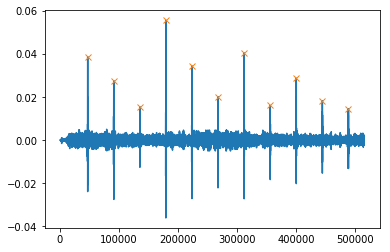

In [5]:
calculateAccuracy("test1.wav")

Filename: test2.wav
Samplerate: 44100
Min Resolution: 22.675736961451246 us
Lenght: 547456 - 12.413968253968253 s
0.000136054421769
-0.000476190476191
-0.00283446712018
0.00410430839002
0.00208616780045
0.000226757369615
-0.00598639455782
0.00340136054422
-0.00315192743764
-0.00229024943311
-0.704081632653
Shift: 133.53489543968223 us
Shift in day: 11.537414965988546 s


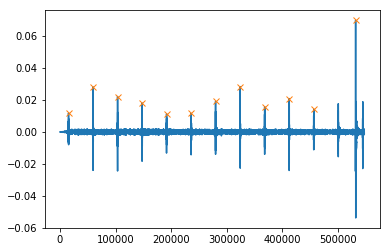

In [6]:
calculateAccuracy("test2.wav")